In [5]:
import pickle
from sklearn.metrics import classification_report
with open('trues.pickle', 'rb') as handle:
    trues = pickle.load(handle)
    
with open('preds.pickle', 'rb') as handle:
    preds = pickle.load(handle)
    
target_names = ['car', 'walking', 'bike', 'train', 'motorcycle']
print(classification_report(preds, trues, target_names=target_names))

              precision    recall  f1-score   support

         car       0.69      0.73      0.71     77670
     walking       0.92      0.46      0.62    100249
        bike       0.80      0.84      0.82     90171
       train       0.19      0.67      0.29     14526
  motorcycle       0.00      0.00      0.00      4089

    accuracy                           0.66    286705
   macro avg       0.52      0.54      0.49    286705
weighted avg       0.77      0.66      0.68    286705



In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

[[56526 14028  6163  3655  1277]
 [ 2549 46378   113   932   176]
 [   52 17711 75651   146   771]
 [18495 20564  1850  9793  1860]
 [   48  1568  6394     0     5]]


Text(46.25, 0.5, 'true')

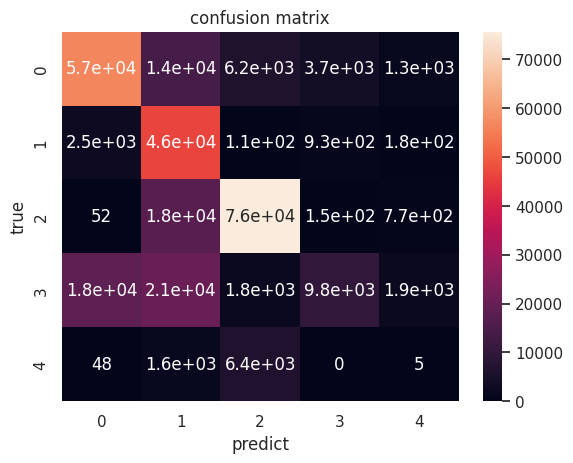

In [11]:
sns.set()
f,ax=plt.subplots()

C2= confusion_matrix(trues, preds)
print(C2) #打印出来看看
sns.heatmap(C2,annot=True,ax=ax) #画热力图

ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴

In [13]:
import os
import numpy as np
import pandas as pd
root_path = "../Run_logs/logs/"
path_list = os.listdir(root_path)

def parse_all_info(path_name):
    model_index = path_name.find("model_")
    data_index  = path_name.find("data_")
    seed_index  = path_name.find("seed_")
    channel_index = path_name.find("Seperation_")
    Mixup_index = path_name.find("Mixup_")
    RandomAug_index = path_name.find("RandomAug_")
    Mixupargmax_index = path_name.find("Mixupargmax")
    
    model_name = path_name[model_index+6:data_index-1]
    data_name  = path_name[data_index+5:seed_index-1]
    seed       = int(path_name[seed_index+5])
    channel_name = path_name[channel_index+11:channel_index+15]
    Mixup_name = float(path_name[Mixup_index+6:Mixup_index+9])
    
    if channel_name == "True":
        channel_name = True
    else:
        channel_name = False
    if Mixup_name == 1.0:
        Mixup_name = False
    else:
        Mixup_name = True
    RandomAug_name = float(path_name[RandomAug_index+10:RandomAug_index+13])
    if RandomAug_name == 1.0:
        RandomAug_name = False
    else:
        RandomAug_name = True
    Mixupargmax_name = path_name[Mixupargmax_index+12:Mixupargmax_index+17]
    if Mixupargmax_name == "True":
        Mixupargmax_name = True
    else:
        Mixupargmax_name = False
    
    return model_name,data_name,seed,channel_name,Mixup_name,RandomAug_name,Mixupargmax_name

In [14]:
#os.listdir(root_path)

In [15]:
# check which exp should be to run
models_type_list = ["deepconvlstm_attn","deepconvlstm","attend","mcnn","tinyhar"]
data_list = ["hapt", "dg" ,"wisdm", "dsads" ,"oppo" ,"pamap2","rw"]
data_cv_number = {"hapt":10, "dg": 10,"wisdm":10, "dsads" :8,"oppo":4 ,"pamap2":9,"rw":15}
seed = 2
for model in models_type_list:
    for data in data_list:
        filtered_path = []
        need_to_check = []
        for path in path_list:
            model_name, data_name , seed_name, channel_name,Mixup_name, RandomAug_name, Mixupargmax_name = parse_all_info(path)
            if model_name == model and data_name == data and Mixupargmax_name and seed_name==seed:
                
                if len(os.listdir(os.path.join(root_path,path))) == data_cv_number[data_name]+1 or len(os.listdir(os.path.join(root_path,path))) == data_cv_number[data_name]+2:
                    filtered_path.append(path)
                
                else:
                    need_to_check.append(path)
                    print(path)
                                                                                                      
                                                                                                
        print("model : {}, data : {}, number : {}".format(model,data,len(filtered_path)))

model : deepconvlstm_attn, data : hapt, number : 8
model : deepconvlstm_attn, data : dg, number : 8
model : deepconvlstm_attn, data : wisdm, number : 8
model : deepconvlstm_attn, data : dsads, number : 8
model : deepconvlstm_attn, data : oppo, number : 8
model : deepconvlstm_attn, data : pamap2, number : 8
model : deepconvlstm_attn, data : rw, number : 8
model : deepconvlstm, data : hapt, number : 8
model : deepconvlstm, data : dg, number : 8
model : deepconvlstm, data : wisdm, number : 8
model : deepconvlstm, data : dsads, number : 8
model : deepconvlstm, data : oppo, number : 8
model : deepconvlstm, data : pamap2, number : 8
model : deepconvlstm, data : rw, number : 8
model : attend, data : hapt, number : 8
model : attend, data : dg, number : 8
model : attend, data : wisdm, number : 8
model : attend, data : dsads, number : 8
model : attend, data : oppo, number : 8
model : attend, data : pamap2, number : 8
model_attend_data_rw_seed_2_differencing_True_Seperation_True_magnitude_False_M

In [16]:

result_to_save = {}


for model_to_check in models_type_list:
    for data_to_check in data_list:
        for seed_to_check in [1,2]:
            out_config = "{}_{}_{}".format(model_to_check,data_to_check,str(seed_to_check))
            # find the right folders
            filtered_path = []
            for path in path_list:
                model_name, data_name , seed_name, channel_name,Mixup_name, RandomAug_name, Mixupargmax_name = parse_all_info(path)
                if model_name == model_to_check and data_name == data_to_check and Mixupargmax_name and seed_to_check==seed_name:
                    filtered_path.append(path)

            # Parse the result
            result = {}
            for path in filtered_path:
                model_name, data_name , seed_name, channel_name,Mixup_name, RandomAug_name, Mixupargmax_name = parse_all_info(path)
                config = "_".join([str(channel_name),str(Mixup_name), str(RandomAug_name)])
                path = os.path.join(root_path,path,'score.txt')

                if not os.path.exists(path):
                    print(config)


                with open(path) as f:
                    lines = f.readlines()

                macro_F1_list = []
                weighted_F1_list = []
                for line in lines:
                    #print(line)
                    weighted_F1_index = line.find("Test weighted F1:")
                    #print("weighted_F1_index",weighted_F1_index)
                    macro_F1_index    = line.find("Test macro F1")
                    #print("macro_F1_index",macro_F1_index)
                    weighted_F1 = float(line[weighted_F1_index+18:weighted_F1_index+27])
                    #print("weighted_F1",weighted_F1)
                    macro_F1 = float(line[macro_F1_index+13:macro_F1_index+23])
                    #print("macro_F1",macro_F1)
                    macro_F1_list.append(macro_F1)
                    weighted_F1_list.append(weighted_F1)
                mean_weighted_F1 = np.mean(weighted_F1_list)
                mean_macro_F1  = np.mean(macro_F1_list)
                result[config] = [mean_weighted_F1, mean_macro_F1]

            # change the result into  dataframe 
            df_macro = pd.DataFrame()
            df_weighted = pd.DataFrame()

            key_list = list(result.keys())
            mean_macro_F1 = []
            mean_weighted_F1 = []
            for key in key_list:
                mean_macro_F1.append(result[key][1])
                mean_weighted_F1.append(result[key][0])

            df_macro["col"] = key_list
            df_macro["score"] = mean_macro_F1

            df_weighted["col"] = key_list
            df_weighted["score"] = mean_weighted_F1

            result_to_save[out_config] = {"df_macro":df_macro, "df_weighted":df_weighted}

In [17]:
import pickle


with open('result_to_save.pickle', 'wb') as handle:
    pickle.dump(result_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)



In [24]:
len(result_to_save.keys())

70

In [14]:
result_to_save = {}

model_to_check = "tinyhar"

data_to_check = "wisdm"

seed_to_check = 1

out_config = "{}_{}_{}".format(model_to_check,data_to_check,str(seed_to_check))
# find the right folders
filtered_path = []
for path in path_list:
    model_name, data_name , seed_name, channel_name,Mixup_name, RandomAug_name, Mixupargmax_name = parse_all_info(path)
    if model_name == model_to_check and data_name == data_to_check and Mixupargmax_name and seed_to_check==seed_name:
        filtered_path.append(path)

# Parse the result
result = {}
for path in filtered_path:
    model_name, data_name , seed_name, channel_name,Mixup_name, RandomAug_name, Mixupargmax_name = parse_all_info(path)
    config = "_".join([str(channel_name),str(Mixup_name), str(RandomAug_name)])
    path = os.path.join(root_path,path,'score.txt')

    if not os.path.exists(path):
        print(config)
        
        
    with open(path) as f:
        lines = f.readlines()
    
    macro_F1_list = []
    weighted_F1_list = []
    for line in lines:
        weighted_F1_index = line.find("Test weighted F1:")
        macro_F1_index    = line.find("Test macro F1:")
        weighted_F1 = float(line[weighted_F1_index+18:weighted_F1_index+27])
        macro_F1 = float(line[macro_F1_index+18:macro_F1_index+27])
        macro_F1_list.append(macro_F1)
        weighted_F1_list.append(weighted_F1)
    mean_weighted_F1 = np.mean(weighted_F1_list)
    mean_macro_F1  = np.mean(macro_F1_list)
    result[config] = [mean_weighted_F1, mean_macro_F1]
    
# change the result into  dataframe 
df_macro = pd.DataFrame()
df_weighted = pd.DataFrame()

key_list = list(result.keys())
mean_macro_F1 = []
mean_weighted_F1 = []
for key in key_list:
    mean_macro_F1.append(result[key][1])
    mean_weighted_F1.append(result[key][0])
    
df_macro["col"] = key_list
df_macro["score"] = mean_macro_F1

df_weighted["col"] = key_list
df_weighted["score"] = mean_weighted_F1

result_to_save[out_config] = {"df_macro":df_macro, "df_weighted":df_weighted}

In [15]:
result_to_save

{'tinyhar_wisdm_1': {'df_macro':                  col     score
  0    False_True_True  0.902006
  1     True_True_True  0.911602
  2  False_False_False  0.889868
  3    True_False_True  0.888171
  4   False_True_False  0.907518
  5   False_False_True  0.883337
  6    True_True_False  0.911310
  7   True_False_False  0.895573,
  'df_weighted':                  col     score
  0    False_True_True  0.902006
  1     True_True_True  0.911602
  2  False_False_False  0.889868
  3    True_False_True  0.888172
  4   False_True_False  0.907519
  5   False_False_True  0.883338
  6    True_True_False  0.911311
  7   True_False_False  0.895573}}

In [13]:
df_macro

,col,score
0,False_True_True,0.902006
1,True_True_True,0.911602
2,False_False_False,0.889868
3,True_False_True,0.888171
4,False_True_False,0.907518
5,False_False_True,0.883337
6,True_True_False,0.911310
7,True_False_False,0.895573


In [7]:
result = {}
for path in filtered_path:
    model_name, data_name , seed_name, channel_name,Mixup_name, RandomAug_name, Mixupargmax_name = parse_all_info(path)
    config = "_".join([str(channel_name),str(Mixup_name), str(RandomAug_name)])
    path = os.path.join(root_path,path,'score.txt')

    if not os.path.exists(path):
        print(config)
        
        
    with open(path) as f:
        lines = f.readlines()
    
    macro_F1_list = []
    weighted_F1_list = []
    for line in lines:
        weighted_F1_index = line.find("Test weighted F1:")
        macro_F1_index    = line.find("Test macro F1:")
        weighted_F1 = float(line[weighted_F1_index+18:weighted_F1_index+27])
        macro_F1 = float(line[macro_F1_index+18:macro_F1_index+27])
        macro_F1_list.append(macro_F1)
        weighted_F1_list.append(weighted_F1)
    mean_weighted_F1 = np.mean(weighted_F1_list)
    mean_macro_F1  = np.mean(macro_F1_list)
    result[config] = [mean_weighted_F1, mean_macro_F1]

In [8]:
df_macro = pd.DataFrame()
df_weighted = pd.DataFrame()

key_list = list(result.keys())
mean_macro_F1 = []
mean_weighted_F1 = []
for key in key_list:
    mean_macro_F1.append(result[key][1])
    mean_weighted_F1.append(result[key][0])
    
df_macro["col"] = key_list
df_macro["score"] = mean_macro_F1

df_weighted["col"] = key_list
df_weighted["score"] = mean_weighted_F1

In [9]:
df_macro

,col,score
0,False_True_True,0.902006
1,True_True_True,0.911602
2,False_False_False,0.889868
3,True_False_True,0.888171
4,False_True_False,0.907518
5,False_False_True,0.883337
6,True_True_False,0.911310
7,True_False_False,0.895573


In [5]:
import numpy as np
np.random.uniform(0,1,1)[0]

0.18580589709666595